In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import jax.numpy as jnp
from jax import grad, jit, random, partial, lax

import context
from models.logistic_regression.logistic_regression_model import gen_data, loglikelihood, logprior
from samplers.timed_sampler import timed_sampler_factory

from sgmcmcjax.kernels import build_sgld_kernel, build_sgldCV_kernel, build_badodab_kernel, build_baoab_kernel, build_sghmc_kernel


# Logistic regression

In [8]:


key = random.PRNGKey(42)
dim = 10
Ndata = 100000

theta_true, X, y_data = gen_data(key, dim, Ndata)

# batch_size = int(0.01*X.shape[0])
data = (X, y_data)


generating data, with N=100000 and dim=10


## timed sampler

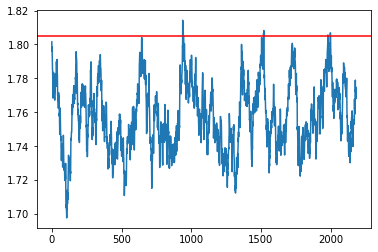

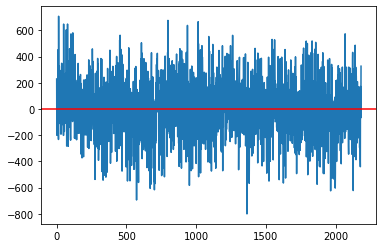

In [17]:
my_timed_sampler = timed_sampler_factory(*build_sgld_kernel(1e-5, 
                        loglikelihood, logprior, data, int(0.1*X.shape[0])))

key = random.PRNGKey(0)
samples, mygrads = my_timed_sampler(key, 1, theta_true)


idx = 7
plt.plot(np.array(samples)[:, idx])
plt.axhline(theta_true[idx], c='r')
plt.show()


idx = 7
plt.plot(np.array(mygrads)[:, idx])
plt.axhline(theta_true[idx], c='r')
plt.show()


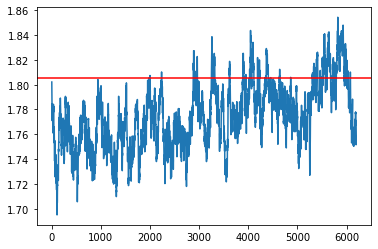

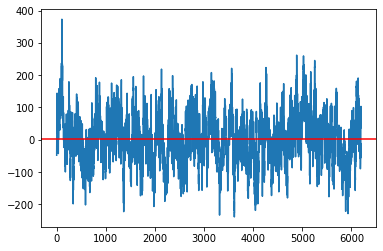

In [18]:
my_timed_sampler = timed_sampler_factory(*build_sgldCV_kernel(1e-5, 
                             loglikelihood, logprior, data, int(0.01*X.shape[0]), theta_true))

key = random.PRNGKey(0)
samples, mygrads = my_timed_sampler(key, 1, theta_true)


idx = 7
plt.plot(np.array(samples)[:, idx])
plt.axhline(theta_true[idx], c='r')
plt.show()


idx = 7
plt.plot(np.array(mygrads)[:, idx])
plt.axhline(theta_true[idx], c='r')
plt.show()


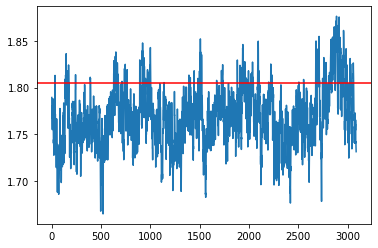

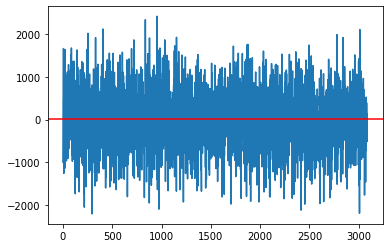

In [35]:
my_timed_sampler = timed_sampler_factory(*build_sghmc_kernel(1e-6, 10, 
                             loglikelihood, logprior, data, int(0.01*X.shape[0])))

key = random.PRNGKey(0)
samples, mygrads = my_timed_sampler(key, 1, theta_true)


idx = 7
plt.plot(np.array(samples)[:, idx])
plt.axhline(theta_true[idx], c='r')
plt.show()


idx = 7
plt.plot(np.array(mygrads)[:, idx])
plt.axhline(theta_true[idx], c='r')
plt.show()


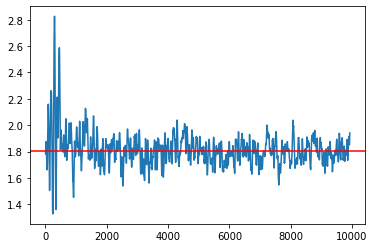

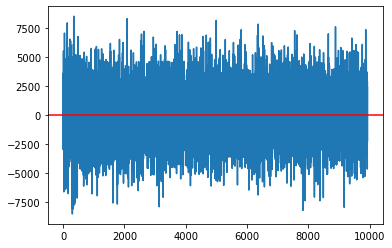

In [24]:
my_timed_sampler = timed_sampler_factory(*build_badodab_kernel(1e-3, 
                             loglikelihood, logprior, data, int(0.001*X.shape[0])))

key = random.PRNGKey(0)
samples, mygrads = my_timed_sampler(key, 3, theta_true)


idx = 7
plt.plot(np.array(samples)[:, idx])
plt.axhline(theta_true[idx], c='r')
plt.show()


idx = 7
plt.plot(np.array(mygrads)[:, idx])
plt.axhline(theta_true[idx], c='r')
plt.show()


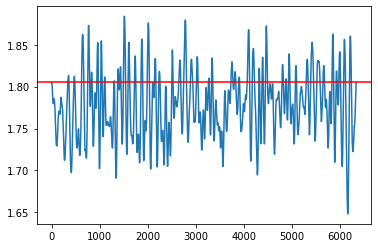

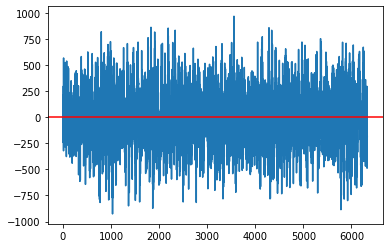

In [38]:
my_timed_sampler = timed_sampler_factory(*build_baoab_kernel(1e-3, 5,
                             loglikelihood, logprior, data, int(0.1*X.shape[0])))

key = random.PRNGKey(0)
samples, mygrads = my_timed_sampler(key, 3, theta_true)


idx = 7
plt.plot(np.array(samples)[:, idx])
plt.axhline(theta_true[idx], c='r')
plt.show()


idx = 7
plt.plot(np.array(mygrads)[:, idx])
plt.axhline(theta_true[idx], c='r')
plt.show()
